In [1]:
# Import libraries
import moments, moments.LD
import pandas as pd, numpy as np
from collections import defaultdict
import demes, demesdraw, matplotlib.pylab as plt
import msprime as ms

import model, slice, get_LD, plot_LD

In [38]:
# Get IIRC 
def get_crt(demes_model,pop,T,sample_size):
    """
    Returns two arrays: the Coalescence rate and the Inferred Inverse Coalescence Rate (Popsize)
    """
    m = ms.Demography.from_demes(demes_model)
    debug = m.debug()
    R, _ = debug.coalescence_rate_trajectory(T, {pop: sample_size})
    inversed_R = 1/(2*R)

    return R,inversed_R

def get_crt_crosspop(demes_model,pop1,pop2,T,sample_size):
    """
    Returns two arrays: the Coalescence rate and the Inferred Inverse Coalescence Rate (Popsize)
    """
    m = ms.Demography.from_demes(demes_model)
    debug = m.debug()
    R, _ = debug.coalescence_rate_trajectory(T, {pop1: sample_size[0],pop2: sample_size[1]})
    inversed_R = 1/(2*R)

    return R,inversed_R

def plot_comparison(LDpop1,LDpop2,labels=["Original","Size Change"]):
    rhos = np.logspace(-2, 2, 21)
    
    # plot D2
    f = plt.figure(figsize=(10,3))
    ax = f.add_subplot(121)
    ax2 = f.add_subplot(122)

    ax.plot(rhos,LDpop1[:,0],label=labels[0])
    ax.plot(rhos,LDpop2[:,0],label=labels[1])
    ax.legend()
    ax.set_yscale("log")
    ax.set_xscale("log")
    ax.set_ylabel(r"$\sigma_d^2$")
    ax.set_xlabel(r"$\rho$")

    # plot DZ
    ax2.plot(rhos,LDpop1[:,1],label=labels[0])
    ax2.plot(rhos,LDpop2[:,1],label=labels[1])
    ax2.legend()
    ax2.set_yscale("log")
    ax2.set_xscale("log")
    ax2.set_ylabel(r"$\sigma_{Dz}$")
    ax2.set_xlabel(r"$\rho$")

    plt.tight_layout()
    plt.show()

def plot_iicr(iirc,T): 
    plt.plot(T, iirc)
    plt.xticks(fontsize= 12)
    plt.yticks(fontsize= 12)
    plt.yscale("log")
    plt.xscale("log")
    plt.xlabel("time ago (years)",fontsize = 14)
    plt.ylabel(r"IICR",fontsize = 14);

In [11]:
# Get model
mws = model.load_yaml("merger_with_stem_migration.yaml")

# Get times to sample
T,times_dic = slice.sample_timepoints(mws,50,10e7)
times_in_gen = T/29
times_in_gen[0] = 1

<AxesSubplot:ylabel='time ago (years)'>

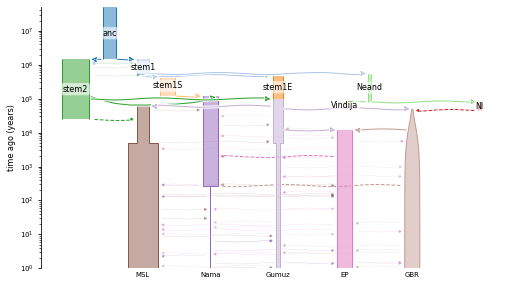

In [12]:
demesdraw.tubes(mws, log_time=True, num_lines_per_migration=3)

In [13]:
# Compute LD from present day pops in model
mws_sliced = slice.slice_timepoints(mws,time_points=[0])
mws_sliced_LD = get_LD.get_LD_from_sliced_demes(mws_sliced)

Sample size 2

/home/gfemer/moments/lib/python3.8/site-packages/msprime/demography.py:4320: UserWarning: Doubling the number of steps has resulted in different  predictions, please re-run with smaller step sizes to ensure  numerical accuracy.
  warnings.warn(


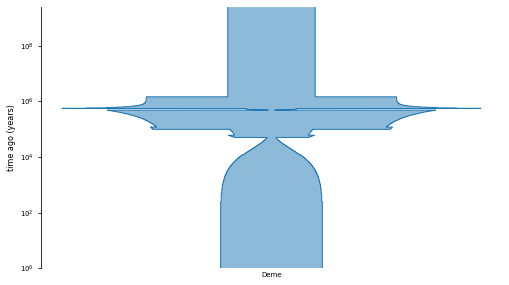

In [14]:
gbr_R, gbr_iicr = get_crt(mws,pop="GBR",T=times_in_gen,sample_size=2)
mws_gbr = model.size_change_from_iicr(gbr_iicr,T,time_units="years")

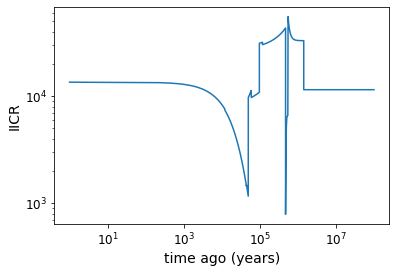

In [15]:
plot_iicr(gbr_iicr,T)

In [16]:
# Actually slice
mws_gbr_sliced = slice.slice_timepoints(mws_gbr,time_points=[0])
mws_gbr_sliced_LD = get_LD.get_LD_from_sliced_demes(mws_gbr_sliced)


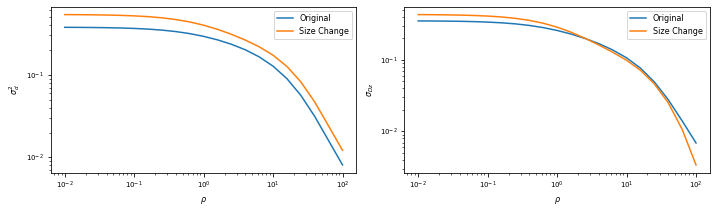

In [39]:
plot_comparison(mws_sliced_LD['GBR'][-1],mws_gbr_sliced_LD['Deme'][-1])

Sample size 10

/home/gfemer/moments/lib/python3.8/site-packages/msprime/demography.py:4320: UserWarning: Doubling the number of steps has resulted in different  predictions, please re-run with smaller step sizes to ensure  numerical accuracy.
  warnings.warn(


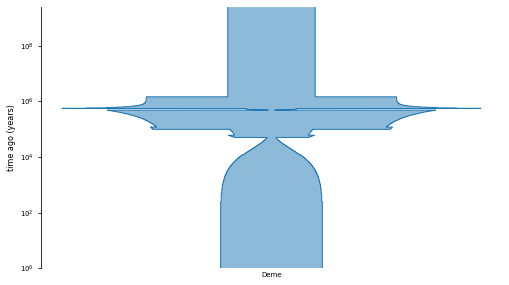

In [18]:
gbr_R, gbr_iicr_4 = get_crt(mws,pop="GBR",T=times_in_gen,sample_size=10)
mws_gbr_4 = model.size_change_from_iicr(gbr_iicr_4,T,time_units="years")

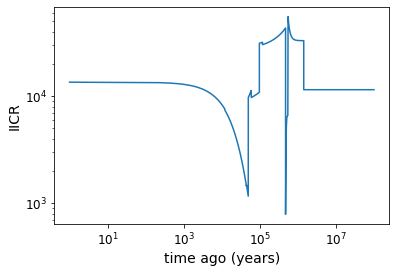

In [19]:
plot_iicr(gbr_iicr_4,T)

In [20]:
# Actually slice
mws_gbr_sliced_4 = slice.slice_timepoints(mws_gbr_4,time_points=[0])
mws_gbr_sliced_LD_4 = get_LD.get_LD_from_sliced_demes(mws_gbr_sliced_4)


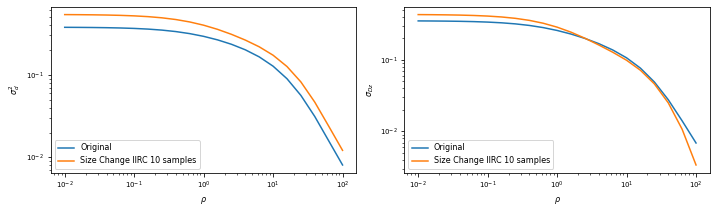

In [41]:
plot_comparison(mws_sliced_LD['GBR'][-1],mws_gbr_sliced_LD_4['Deme'][-1],labels=["Original","Size Change IIRC 10 samples"])

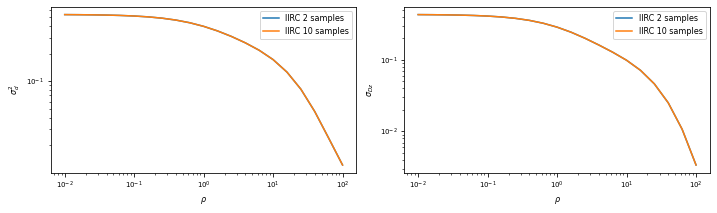

In [42]:
plot_comparison(mws_gbr_sliced_LD['Deme'][-1],mws_gbr_sliced_LD_4['Deme'][-1],labels=["IIRC 2 samples","IIRC 10 samples"])

Cross population 2 samples per pop

/home/gfemer/moments/lib/python3.8/site-packages/msprime/demography.py:4320: UserWarning: Doubling the number of steps has resulted in different  predictions, please re-run with smaller step sizes to ensure  numerical accuracy.
  warnings.warn(


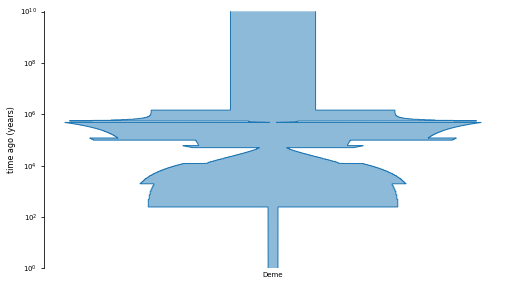

In [52]:
cpop_R, cpop_iicr = get_crt_crosspop(mws,pop1="GBR",pop2="Nama",T=times_in_gen,sample_size=[2,2])
mws_cpop = model.size_change_from_iicr(cpop_iicr,T,time_units="years")

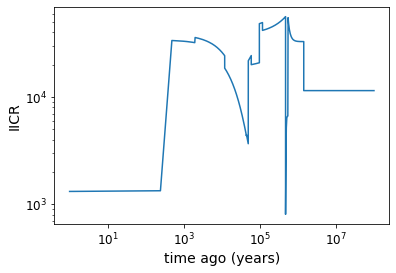

In [53]:
plot_iicr(cpop_iicr,T)

In [55]:
mws_cpop_sliced = slice.slice_timepoints(mws_cpop,time_points=[0])
mws_cpop_sliced_LD = get_LD.get_LD_from_sliced_demes(mws_cpop_sliced)

cross population, 10 samples per pop

/home/gfemer/moments/lib/python3.8/site-packages/msprime/demography.py:4320: UserWarning: Doubling the number of steps has resulted in different  predictions, please re-run with smaller step sizes to ensure  numerical accuracy.
  warnings.warn(


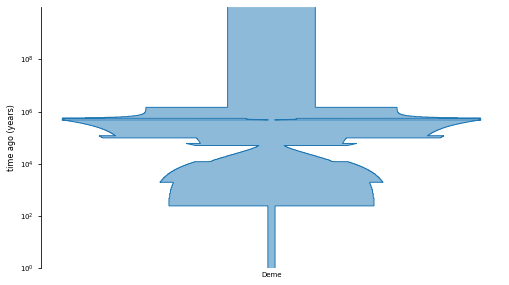

In [56]:
cpop_R, cpop_iicr_10 = get_crt_crosspop(mws,pop1="GBR",pop2="Nama",T=times_in_gen,sample_size=[10,10])
mws_cpop_10 = model.size_change_from_iicr(cpop_iicr_10,T,time_units="years")

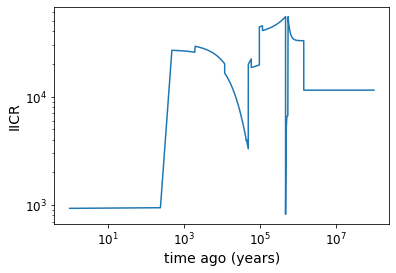

In [57]:
plot_iicr(cpop_iicr_10,T)

In [58]:
mws_cpop_sliced_10 = slice.slice_timepoints(mws_cpop_10,time_points=[0])
mws_cpop_sliced_LD_10 = get_LD.get_LD_from_sliced_demes(mws_cpop_sliced_10)

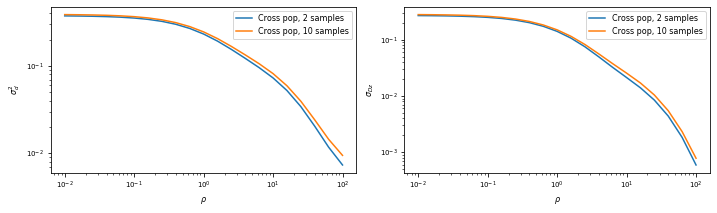

In [59]:
# Cross pop vs cross pop
plot_comparison(mws_cpop_sliced_LD['Deme'][-1],mws_cpop_sliced_LD_10['Deme'][-1],labels=["Cross pop, 2 samples","Cross pop, 10 samples"])

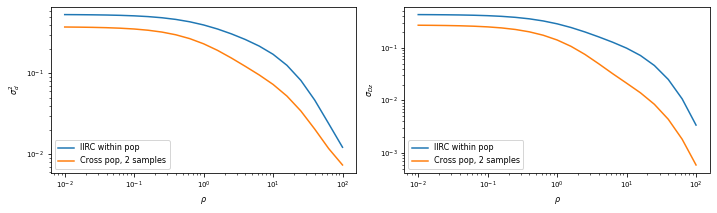

In [60]:
# Within pop vs cross pop
plot_comparison(mws_gbr_sliced_LD['Deme'][-1],mws_cpop_sliced_LD['Deme'][-1],labels=["IIRC within pop","Cross pop, 2 samples"])

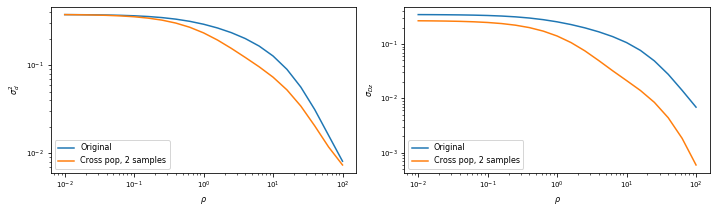

In [61]:
# Cross pop vs original model LD
plot_comparison(mws_sliced_LD['GBR'][-1],mws_cpop_sliced_LD['Deme'][-1],labels=["Original","Cross pop, 2 samples"])

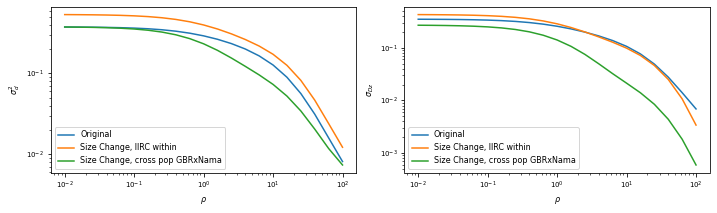

In [62]:
LDpop1=mws_sliced_LD['GBR'][-1]
LDpop2=mws_gbr_sliced_LD['Deme'][-1]
LDpop3=mws_cpop_sliced_LD['Deme'][-1]

labels=["Original","Size Change, IIRC within","Size Change, cross pop GBRxNama"]

rhos = np.logspace(-2, 2, 21)

# plot D2
f = plt.figure(figsize=(10,3))
ax = f.add_subplot(121)
ax2 = f.add_subplot(122)

ax.plot(rhos,LDpop1[:,0],label=labels[0])
ax.plot(rhos,LDpop2[:,0],label=labels[1])
ax.plot(rhos,LDpop3[:,0],label=labels[2])
ax.legend()
ax.set_yscale("log")
ax.set_xscale("log")
ax.set_ylabel(r"$\sigma_d^2$")
ax.set_xlabel(r"$\rho$")

# plot DZ
ax2.plot(rhos,LDpop1[:,1],label=labels[0])
ax2.plot(rhos,LDpop2[:,1],label=labels[1])
ax2.plot(rhos,LDpop3[:,1],label=labels[2])
ax2.legend()
ax2.set_yscale("log")
ax2.set_xscale("log")
ax2.set_ylabel(r"$\sigma_{Dz}$")
ax2.set_xlabel(r"$\rho$")

plt.tight_layout()
plt.savefig("IICR_experiment_3scenarios_GBRNama.pdf",format='pdf',transparent = False)
# plt.show()